<a href="https://colab.research.google.com/github/SasiVankina/Happy/blob/master/GOOG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Description: This Program predicts the price of Google Stock for a Specific day

In [1]:
#Import Libraries
from sklearn.svm import SVR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

In [19]:
# Load the data
from google.colab import files
uploaded = files.upload()


Saving GOOG.csv to GOOG (1).csv


In [18]:
#store and look at the data
df= pd.read_csv('GOOG.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,6/1/2021,2422.000000,2437.970947,2404.879883,2429.810059,2429.810059,958300
1,6/2/2021,2435.310059,2442.000000,2404.199951,2421.280029,2421.280029,857900
2,6/3/2021,2395.020020,2409.745117,2382.830078,2404.610107,2404.610107,917300
3,6/4/2021,2422.520020,2453.858887,2417.770020,2451.760010,2451.760010,1297400
4,6/7/2021,2451.320068,2468.000000,2441.072998,2466.090088,2466.090088,1192500
5,6/8/2021,2479.899902,2494.495117,2468.239990,2482.850098,2482.850098,1253000
6,6/9/2021,2499.500000,2505.000000,2487.330078,2491.399902,2491.399902,1006300
7,6/10/2021,2494.010010,2523.260010,2494.000000,2521.600098,2521.600098,1561700
8,6/11/2021,2524.919922,2526.989990,2498.290039,2513.929932,2513.929932,1262000
9,6/14/2021,2513.389893,2528.229980,2500.939941,2527.040039,2527.040039,1127500


In [4]:
#Get and print the last row of the data
actual_price = df.tail(1)
actual_price

,Date,Open,High,Low,Close,Adj Close,Volume
20,6/29/2021,2535.449951,2540.0,2508.73999,2520.370117,2520.370117,1047500


In [5]:
#Prepare the data for training
df= df.head(len(df)-1)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,6/1/2021,2422.000000,2437.970947,2404.879883,2429.810059,2429.810059,958300
1,6/2/2021,2435.310059,2442.000000,2404.199951,2421.280029,2421.280029,857900
2,6/3/2021,2395.020020,2409.745117,2382.830078,2404.610107,2404.610107,917300
3,6/4/2021,2422.520020,2453.858887,2417.770020,2451.760010,2451.760010,1297400
4,6/7/2021,2451.320068,2468.000000,2441.072998,2466.090088,2466.090088,1192500
5,6/8/2021,2479.899902,2494.495117,2468.239990,2482.850098,2482.850098,1253000
6,6/9/2021,2499.500000,2505.000000,2487.330078,2491.399902,2491.399902,1006300
7,6/10/2021,2494.010010,2523.260010,2494.000000,2521.600098,2521.600098,1561700
8,6/11/2021,2524.919922,2526.989990,2498.290039,2513.929932,2513.929932,1262000
9,6/14/2021,2513.389893,2528.229980,2500.939941,2527.040039,2527.040039,1127500


In [28]:
#Create an empty list to store the independent and dependent data
days = list()
adj_close_prices = list()

In [29]:
#Get the date and the adjusted close price
df_days = df.loc[:, 'Date']
df_adj_close = df.loc[:, 'Adj Close']

In [30]:
#Create the independent data set
for day in df_days:
  days.append([int(day.split('/')[1])])

#Create the dependent data set
for adj_close in df_adj_close:
 adj_close_prices.append( float(adj_close) )

In [32]:
#Create the 3 Support Vector Regression Models

#Create and Train a SVR model using a linear Kernel
lin_svr = SVR(kernel='linear', C=1000.0)
lin_svr.fit(days, adj_close_prices)

#Create and Train a SVR model using a polynomial Kernel
poly_svr = SVR(kernel='poly', C=1000.0, degree = 2)
poly_svr.fit(days, adj_close_prices)

#Create and Train a SVR model using a rbf Kernel
rbf_svr = SVR(kernel='rbf', C=1000.0, gamma= 0.15)
rbf_svr.fit(days, adj_close_prices)



SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.15,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

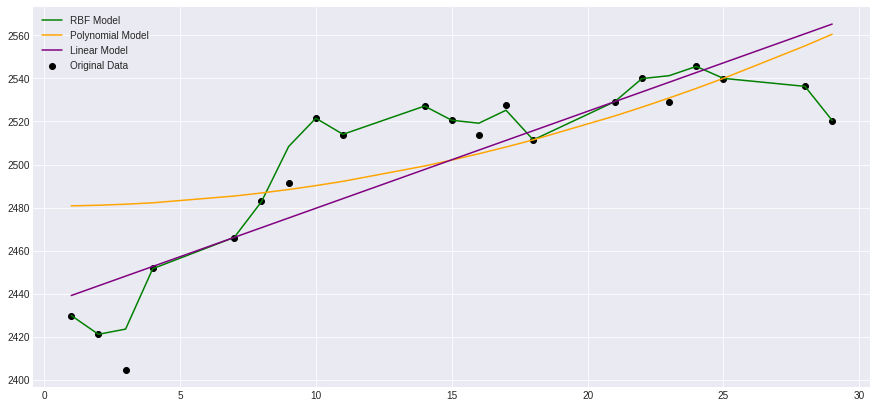

In [33]:
#Plot the modals on a graph to see which has the best fit to the original data
plt.figure(figsize=(15,7))
plt.scatter(days, adj_close_prices, color='black', label='Original Data')
plt.plot(days, rbf_svr.predict(days), color = 'green', label = 'RBF Model')
plt.plot(days, poly_svr.predict(days), color = 'orange', label = 'Polynomial Model')
plt.plot(days, lin_svr.predict(days), color = 'purple', label = 'Linear Model')
plt.legend()
plt.show()